In [2]:
!pip install kagglehub[pandas-datasets]


In [4]:
import os

path = "/kaggle/input/wine-data"
print("Files in dataset folder:", os.listdir(path))


Files in dataset folder: ['wine.csv']


In [5]:
csv_file = os.path.join(path, "wine.csv")  # Use correct filename here


Path to dataset files: /kaggle/input/wine-data
Files in dataset folder: ['wine.csv']
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-6-2ffbf54d6d59>:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


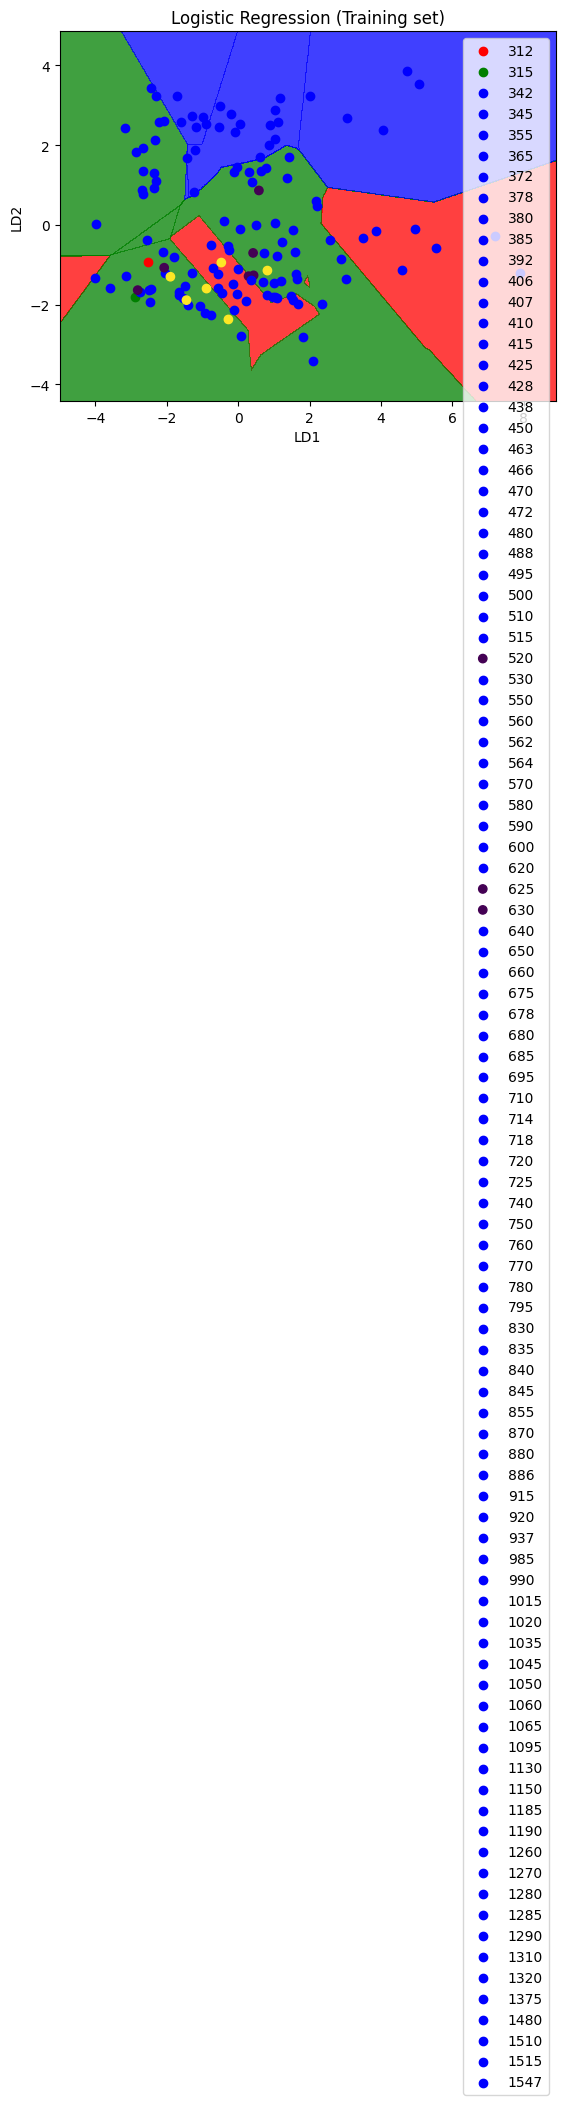

<ipython-input-6-2ffbf54d6d59>:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


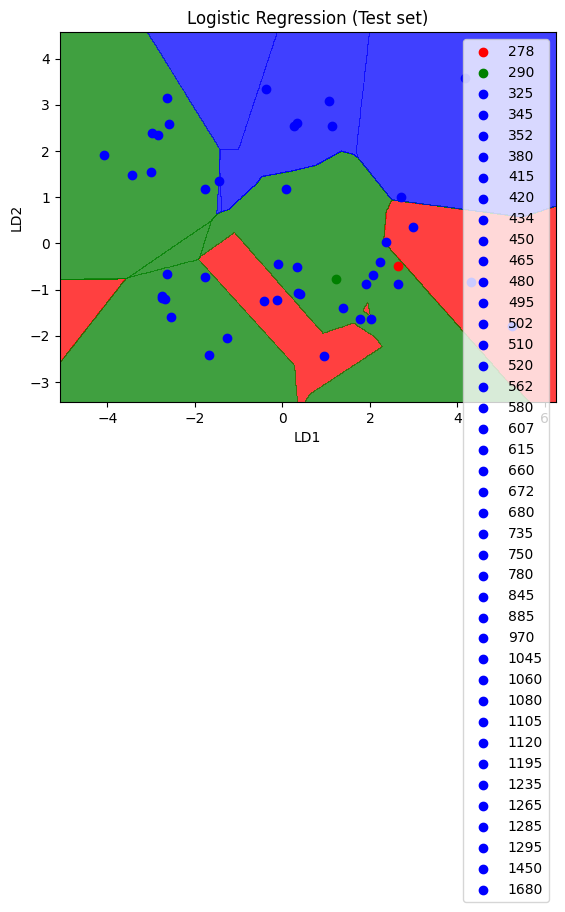

In [6]:
# STEP 0: Install kagglehub if not already installed
!pip install kagglehub[pandas-datasets]

# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import kagglehub

# Step 1: Download dataset
path = kagglehub.dataset_download("hrdkcodes/wine-data")
print("Path to dataset files:", path)
print("Files in dataset folder:", os.listdir(path))  # 👈 See available file names

# Step 2: Correct the filename based on what you see
csv_file = os.path.join(path, "wine.csv")  # Adjusted based on actual file name

# Step 3: Load dataset
dataset = pd.read_csv(csv_file)

# Step 4: Separate features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Step 6: Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 7: Apply LDA
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Step 8: Train Logistic Regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Step 9: Prediction and Confusion Matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 10: Visualization
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(
        X1, X2,
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(('red', 'green', 'blue')),
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green', 'blue'))(i), label=j
        )
    plt.title(title)
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()
    plt.show()

# Visualize
plot_decision_boundary(X_train, y_train, "Logistic Regression (Training set)")
plot_decision_boundary(X_test, y_test, "Logistic Regression (Test set)")

